In [1]:
import xarray as xr
import numpy as np
import cartopy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import dask

In [2]:
ds = {}
for m in range(1, 51):
    print(m)
    ds[m] = xr.open_zarr(f'/nethome/sebil001/NEMO_Ensemble/PGS_spacetime_{m:03d}.zarr/')
print(ds)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
{1: <xarray.Dataset>
Dimensions:     (traj: 2900, obs: 365)
Dimensions without coordinates: traj, obs
Data variables:
    lat         (traj, obs) float64 dask.array<chunksize=(2900, 1), meta=np.ndarray>
    lon         (traj, obs) float64 dask.array<chunksize=(2900, 1), meta=np.ndarray>
    time        (traj, obs) datetime64[ns] dask.array<chunksize=(2900, 1), meta=np.ndarray>
    trajectory  (traj) float64 dask.array<chunksize=(2900,), meta=np.ndarray>
    z           (traj, obs) float64 dask.array<chunksize=(2900, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.1-108-g4bac223f, 2: <xarray.Dataset>
Dimensions:     (traj: 2900, obs: 365)
Dimensions 

In [3]:
dmem = xr.open_zarr(f'Pspacetime_1p_001.zarr/').load()
for m in range(2, 51):
    ds = xr.open_zarr(f'Pspacetime_1p_{m:03d}.zarr/').load()
    dmem = xr.concat([dmem, ds], dim='traj')
    
dmem

FileNotFoundError: No such file or directory: '/storage/home/6525954/NEMO_ensemble/sebille/Pspacetime_1p_001.zarr'

In [7]:
colors = ['r'] #, 'b', 'c', 'k']
datasets = [ds[2]]
labels = ['Member 2']
psizes = [5]

/opt/apps/miniconda3/envs/parcels-dev/lib/python3.11/site-packages/shapely/creation.py:119: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwargs)
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.11/site-packages/shapely/creation.py:119: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwargs)
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.11/site-packages/shapely/creation.py:119: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwargs)
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.11/site-packages/shapely/creation.py:119: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwargs)
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.11/site-packages/shapely/creation.py:119: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwa

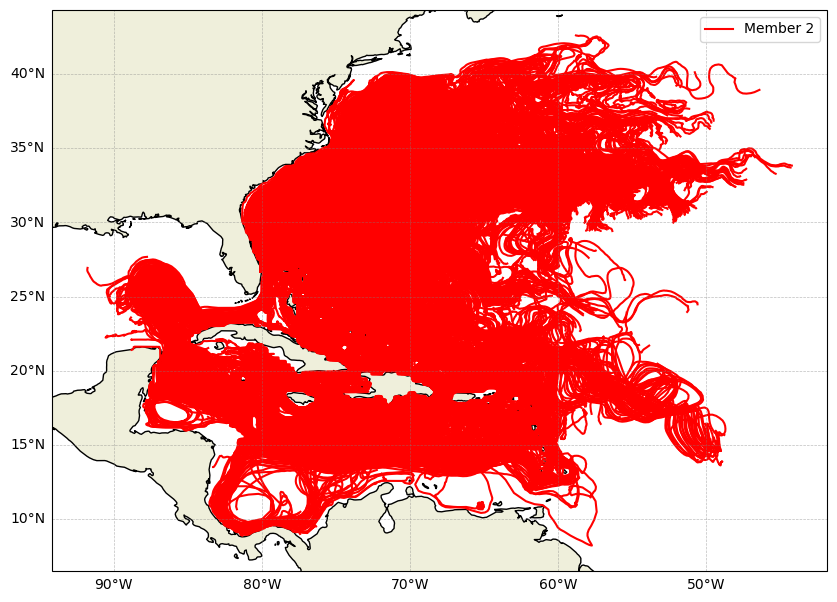

In [8]:
projection = cartopy.crs.PlateCarree(central_longitude=-70)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(10, 9))
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)

for k in range(len(datasets)):
    ax.plot([], c=colors[k], label=labels[k])
    ax.plot(datasets[k].lon.T, datasets[k].lat.T, transform=cartopy.crs.PlateCarree(), c=colors[k])
ax.legend()
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5,
              color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.show()

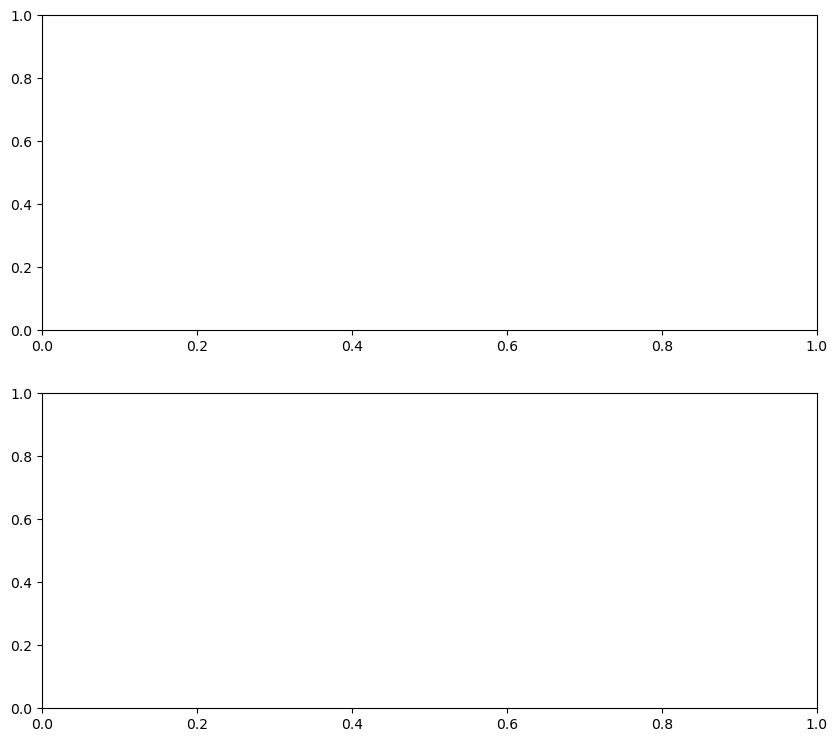

In [9]:
# import geopy

# dist_time = np.hypot((dtime.lat-dtime.lat[0, :])*1852*60, (dtime.lon-dtime.lon[0, :])*1852*60*np.cos(25/180*np.pi))
# dist_space = np.hypot((dspace.lat-dspace.lat[0, :])*1852*60, (dspace.lon-dspace.lon[0, :])*1852*60*np.cos(25/180*np.pi))
# dist_mem = np.hypot((dmem.lat-dmem.lat[0, :])*1852*60, (dmem.lon-dmem.lon[0, :])*1852*60*np.cos(25/180*np.pi))

fig, ax = plt.subplots(2, 1, figsize=(10, 9)) 
for k in range(len(datasets)-1):
    d = datasets[k]
    dist = np.hypot((d.lat-d.lat[0, :])*1852*60, (d.lon-d.lon[0, :])*1852*60*np.cos(25/180*np.pi))
    for i in range(2):
        ax[i].plot(dist[1:,:].T/1e3, colors[k], linewidth=0.2)
        ax[i].plot(np.mean(dist[1:,:], axis=0).T/1e3, colors[k], linewidth=2, label=labels[k])

#     ax[i].plot(dist_space[1:,:].T/1e3, 'r', linewidth=0.2)
#     ax[i].plot(dist_time[1:,:].T/1e3, 'b', linewidth=0.2)
#     ax[i].plot(dist_mem[1:,:].T/1e3, 'c', linewidth=0.2)

#     ax[i].plot(np.mean(dist_space[1:,:], axis=0).T/1e3, 'r', linewidth=2, label='Varying space')
#     ax[i].plot(np.mean(dist_time[1:,:-30], axis=0).T/1e3, 'b', linewidth=2, label='Varying time')
#     ax[i].plot(np.mean(dist_mem[1:,:], axis=0).T/1e3, 'c', linewidth=2, label='Varying member')

    if k == len(datasets)-1:
        ax[i].set_xlabel('Time after release [days]')
        ax[i].set_ylabel('Separation distance [km]')
        if i == 0:
            ax[i].set_xlim([0, 365])
            y0 = 0
        else:
            ax[i].set_xlim([1, 30])
            ax[i].set_yscale('log')
            y0 = 1
        yl = ax[i].get_ylim()
        ax[i].set_ylim([y0, yl[1]])
        ax[i].legend()
plt.show()

In [ ]:
plt.rcParams['savefig.dpi'] = 300

projection = cartopy.crs.PlateCarree(central_longitude=-70)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(10, 9))
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)

plottimes = np.arange(np.datetime64('2010-01-01'), np.datetime64('2010-12-31'), np.timedelta64(1, 'D'))
# plottimes = np.arange(np.datetime64('2010-01-01'), np.datetime64('2010-01-10'), np.timedelta64(1, 'D'))

scat = {}
# cmap = plt.get_cmap("tab10")
cmap = plt.get_cmap('viridis', 50)
for k in ds:
    ax.plot([], color=cmap(k-1), label=f'Member {k}')
    d = ds[k]
    b = np.where(np.logical_and(d['time'] >= plottimes[0], d['time'] < plottimes[1]))
    scat[k] = ax.scatter(d['lon'][b], d['lat'][b], transform=cartopy.crs.PlateCarree(), color=cmap(k-1), s=1)

ttl = ax.set_title('Particles on ' + str(plottimes[0]))
ax.set_extent([-95, -40, 5, 45], crs=cartopy.crs.PlateCarree())
# ax.legend(loc=2)
frames = np.arange(0, len(plottimes)-1)
    
def animate(t):
    for k in ds:
        d = ds[k]
        b = np.where(np.logical_and(d['time'].values[:] >= plottimes[t], d['time'].values[:] < plottimes[t+1]))
        scat[k].set_offsets(np.vstack((d.lon.values[b], d.lat.values[b])).transpose())
    ttl.set_text('Particles on ' + str(plottimes[t]))
    return scat,

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=100)
anim
# writergif = animation.PillowWriter(fps = 10)
# writergif.setup(fig, 'Animation_spacetime.gif', dpi = 300) 
anim.save('Animation_GulfStream.mp4') #, writer=writergif, dpi = "figure")